# Задание 2

In [1]:
import pandas as pd                             # таблицы и операции над данными
import numpy as np                              # работа с векторами и матрицами
import matplotlib.pyplot as plt                 # графики
import seaborn as sns                           # еще графики

%matplotlib inline

from tqdm import tqdm                           # немножко функций для удобства
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas(desc="Example Desc")

import warnings                                 # чтобы никто не мешал бесчинствам с кодом
warnings.filterwarnings('ignore')

## Загрузка и первичный анализ данных:

In [2]:
x_data = pd.read_csv('x_data.csv', sep=';', index_col=['Unnamed: 0'], parse_dates=True, date_parser=lambda x: pd.to_datetime(x))
print(x_data.shape)
x_data.head()

(2103841, 17)


,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [3]:
y_train_df = pd.read_csv('y_train.csv', sep=';', header=None, index_col=0, parse_dates=True, date_parser=lambda x: pd.to_datetime(x))
print(y_train_df.shape)
y_train_df.head()

(29184, 1)


,1
0,
2015-01-04 00:05:00,392
2015-01-04 01:05:00,384
2015-01-04 02:05:00,393
2015-01-04 03:05:00,399
2015-01-04 04:05:00,400


In [4]:
y_submit = pd.read_csv('y_submit.csv', sep=';', header=None, index_col=0, parse_dates=True, date_parser=lambda x: pd.to_datetime(x))
print(y_submit.shape)
y_submit.head()

(5808, 1)


,1
0,
2018-05-04 00:05:00,420
2018-05-04 01:05:00,420
2018-05-04 02:05:00,420
2018-05-04 03:05:00,420
2018-05-04 04:05:00,420


У нас немаленький датасет, поэтому попробуем уменьшить память:

In [5]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
x_data = reduce_mem_usage(x_data)

Memory usage of dataframe is 288.92 MB
Memory usage after optimization is: 276.88 MB
Decreased by 4.2%


Как видно, особого прироста оптимизации мы не получили. Ну да ладно, идём дальше, посмотрим какой промежуток времени считывались данные:

In [7]:
print('Начало записи данных: ', x_data.index[0], ', конец: ', x_data.index[-1], sep='', end='.\n')
print('Начало записи данных для тренировки: ', y_train_df.index[0], ', конец: ', y_train_df.index[-1], sep='', end='.\n')
print('Начало записи данных для предсказания: ', y_submit.index[0], ', конец: ', y_submit.index[-1], sep='', end='.\n')

Начало записи данных: 2015-01-01 00:00:00, конец: 2019-01-01 00:00:00.
Начало записи данных для тренировки: 2015-01-04 00:05:00, конец: 2018-05-03 23:05:00.
Начало записи данных для предсказания: 2018-05-04 00:05:00, конец: 2018-12-31 23:05:00.


Итак, наша целевая переменная измерялась каждый час, а замеры в камерах проводились каждую минуту. Соответсвенно нам нужно их агрегировать по часу. Но что брать? Среднее, медиану, абсолютную медиану и т.д.? Для ответа необходимо посмотреть поближе на наши данные. Для начала посмотрим как менются показания счётчиков в течении часа(пусть будет первого):

In [8]:
def plot_detectors(df, figsize=(15,5)):

    """
        df - dataframe with timeseries
        figsize - size of plot
    """
    
    plt.figure(figsize=figsize)
    plt.title("{} sensors value".format(list(df)[0][:-2]))
    for sensor_name in df:
        plt.plot(df[sensor_name], label=sensor_name)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

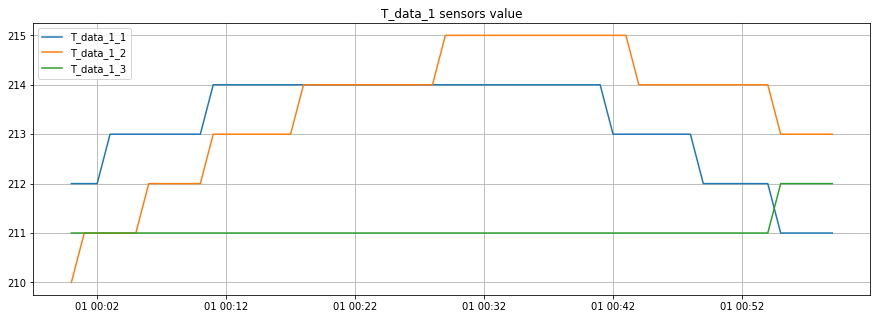

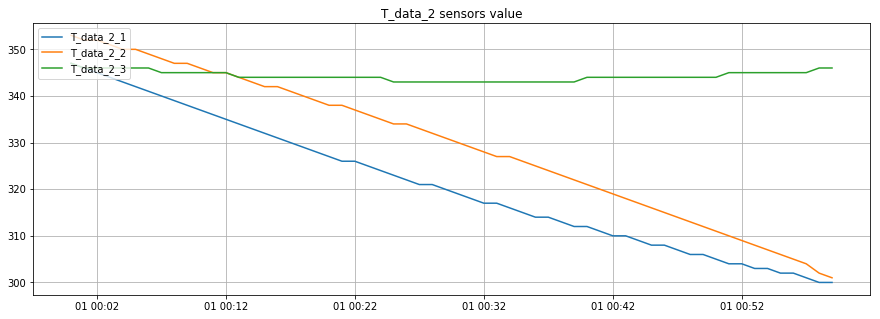

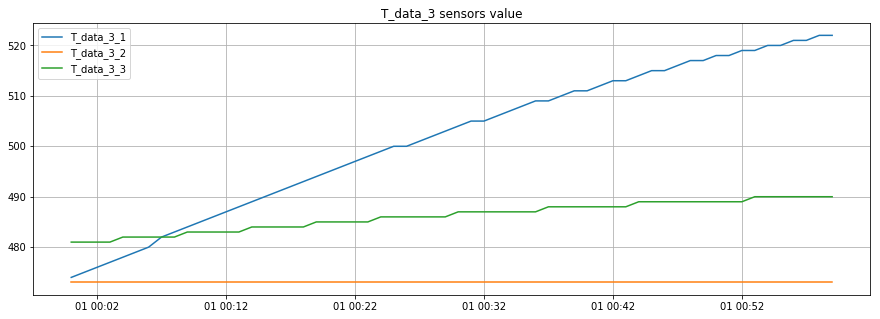

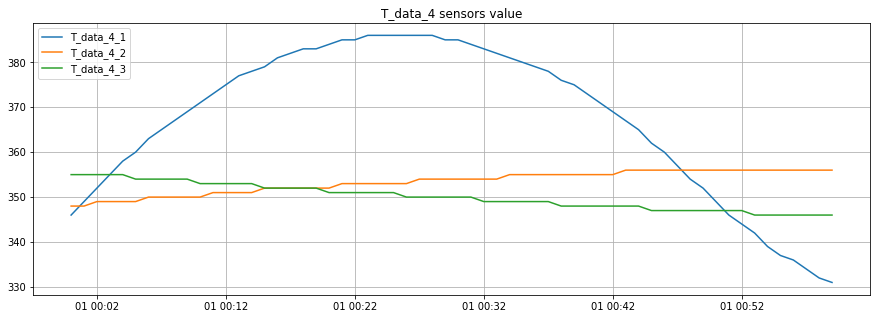

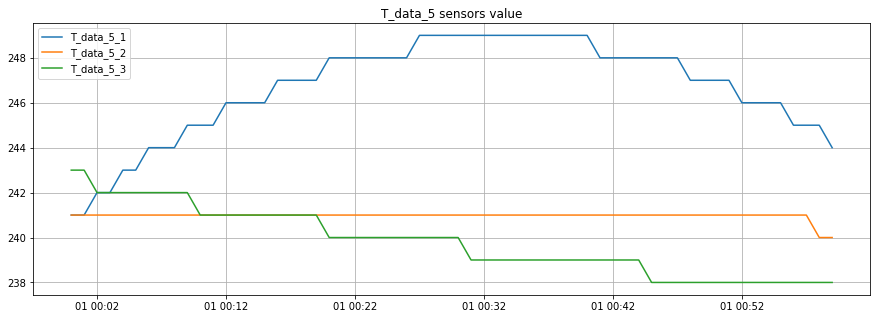

In [9]:
for i in range(1, 6):
    plot_detectors(x_data.loc[:'2015-01-01 00'][[f'T_data_{i}_1', f'T_data_{i}_2', f'T_data_{i}_3']])

Если посмотреть на графики, то складывается такое чувство, что два датчика в каждой камере показывают верную информацию, а один же сбоит. Хотя может быть и наоборот. Пока напрашиваются __три мысли__: 

    первая - датчики расположены хоть и в одной камере, но могут находиться в разных частях, и, соотвественно, их измерения немного отличаются друг от друга;
    вторая - некоторые датчики могут быть дефектными, но тут непонятно кому верить;
    третья - тот датчик, чьи измерения не похожи на два остальных - специальный шум, добавленный для усложнения задания.

Т.к. по анализу одного часа мы не можем судть о всей выборке целиком, сгруппируем данные по неделям и посмотрим на изменения показанчия счётчиков за первую половину 2015 год:

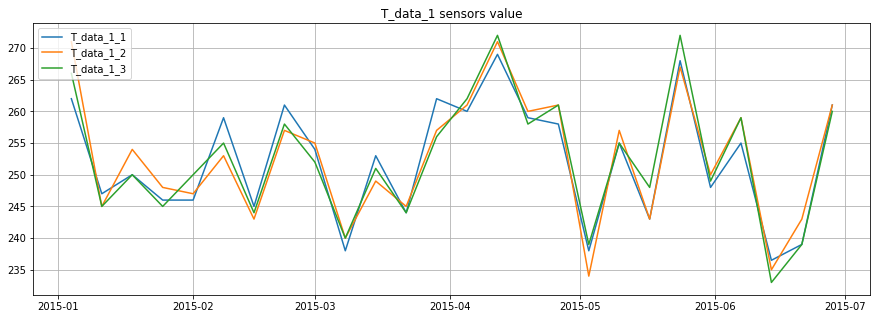

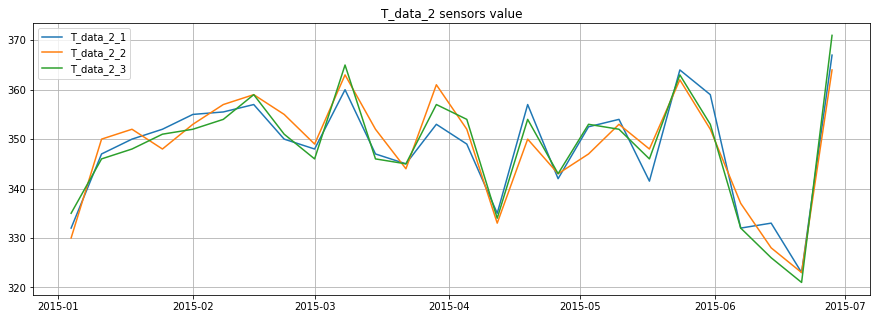

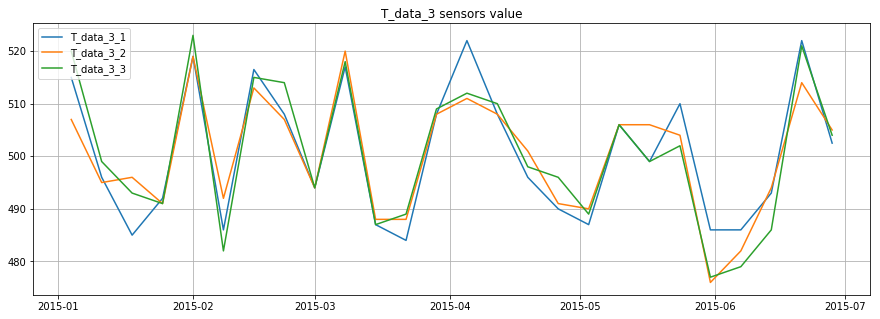

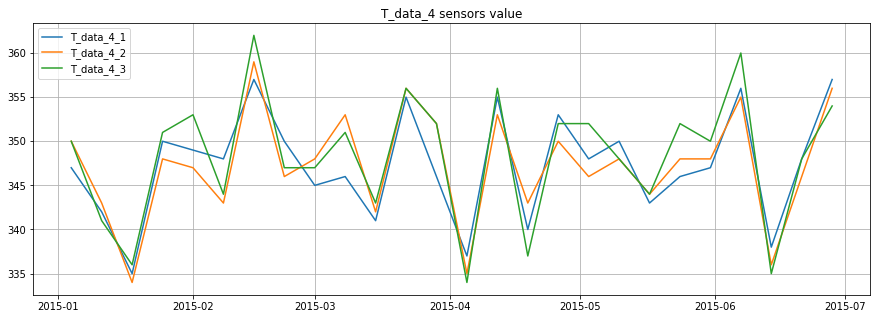

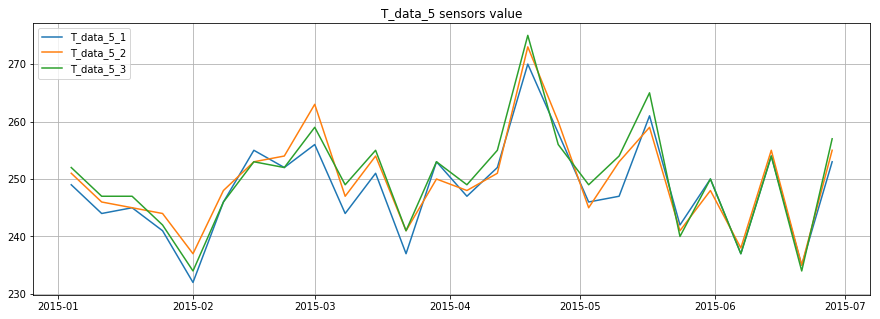

In [10]:
for i in range(1, 6):
    plot_detectors(x_data.groupby(pd.Grouper(level=0, freq="W"), as_index=True).median().loc[:'2015-06'][[f'T_data_{i}_1', f'T_data_{i}_2', f'T_data_{i}_3']])

Проанализировав графики можно увидеть, можно понять, что наши опасения были напрасны, т.к. аномально ведущих себя датчиков мы обнаружить не можем.

На всякий случай посмотрим на корреляцию признаков:

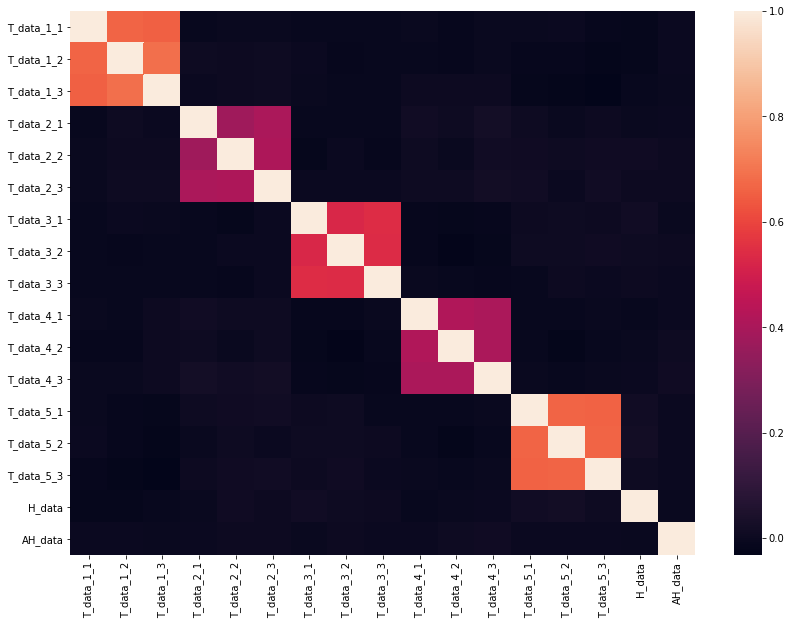

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(x_data.corr());

Видно, что показания датчиков разных камер никак не зависят между собой, значит мы можем считать, что камеры изолированы.
А теперь посмотрим на гистограммы распределения каждого датчика за тот же период(первая половина 2015 года):

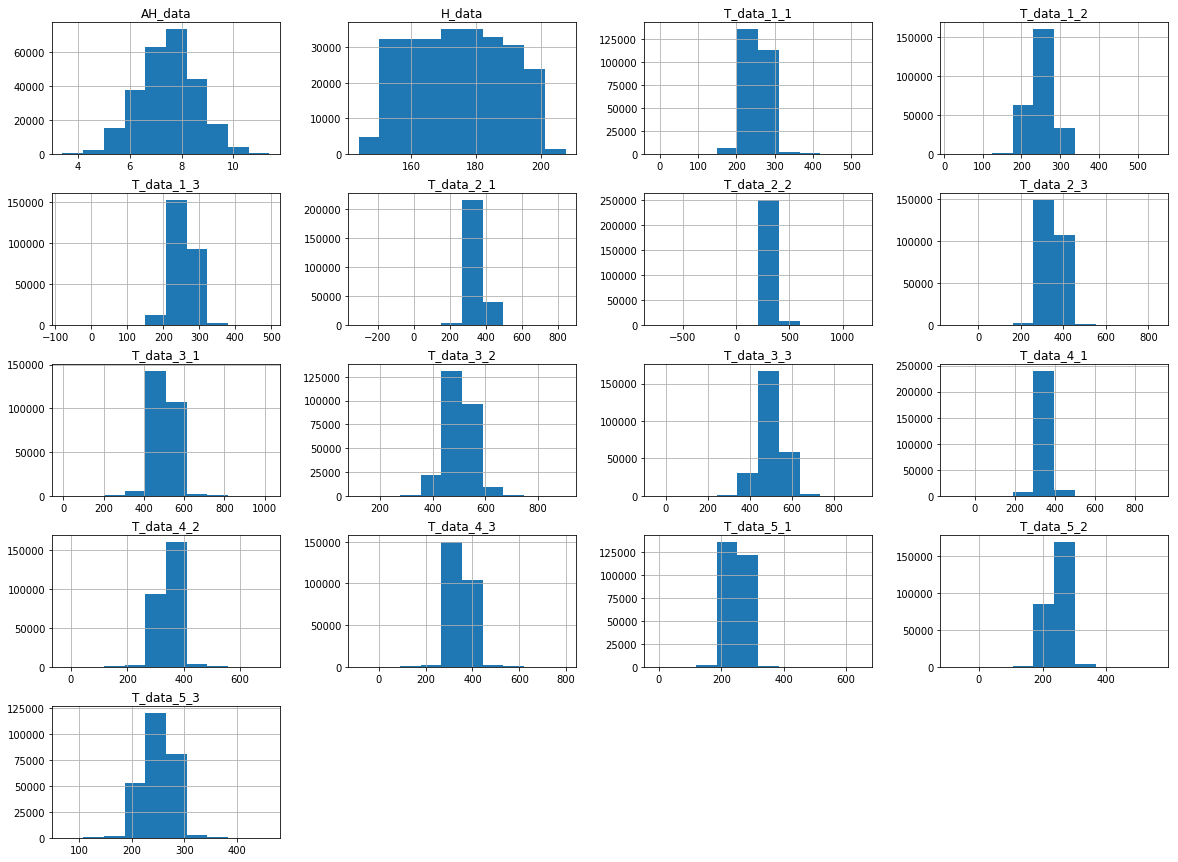

In [12]:
x_data.loc[:'2015-06'].hist(figsize=(20, 15));

Коненчно, мы не можем судить о целой выборке посмотрев только на пол года. Однако уже заметно, что не все значения распределены равномерно и присутсвуют выбросы. Поэтому есть смысл взять робастную оценку, а именно, медиану.
Теперь сгруппируем данные по часу(возьмём медиану) и ещё раз посмотрим на наши данные:

In [13]:
x_data = x_data.groupby(pd.Grouper(level=0, freq="H"), as_index=True).median()

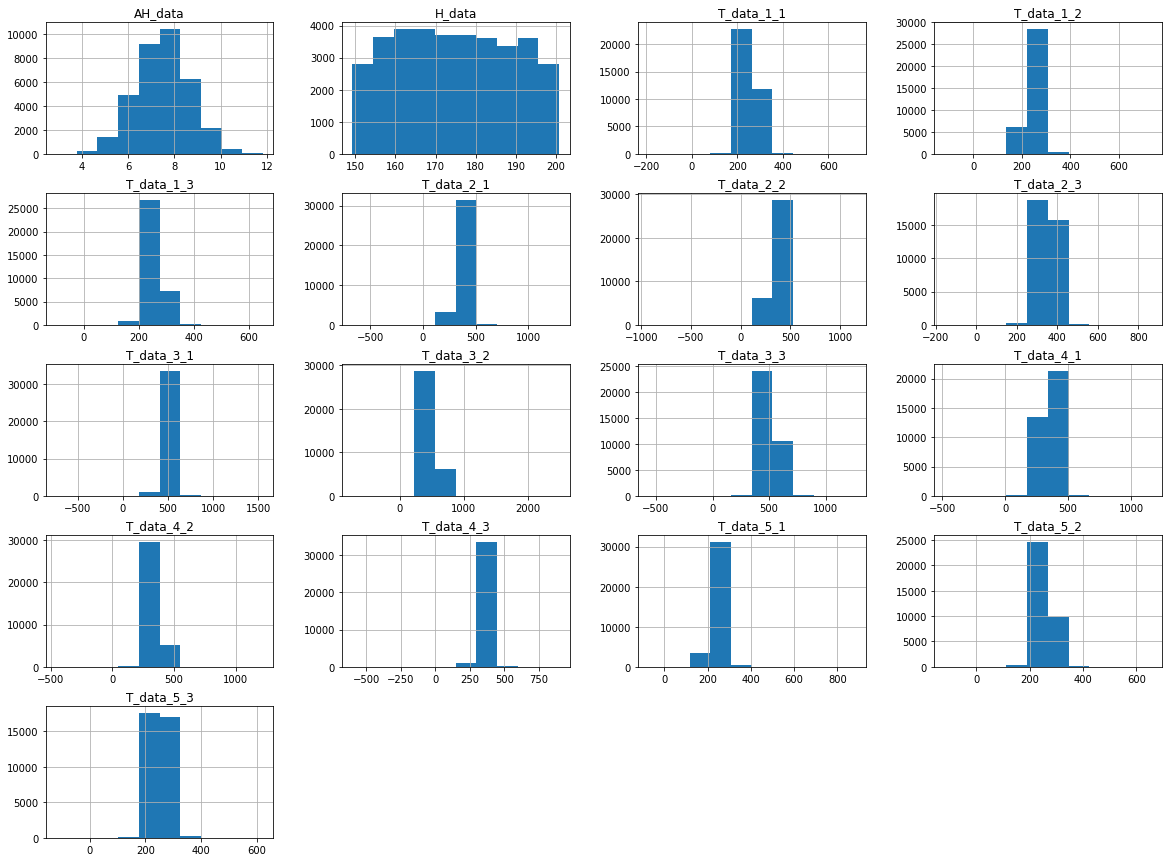

In [14]:
x_data.hist(figsize=(20, 15));

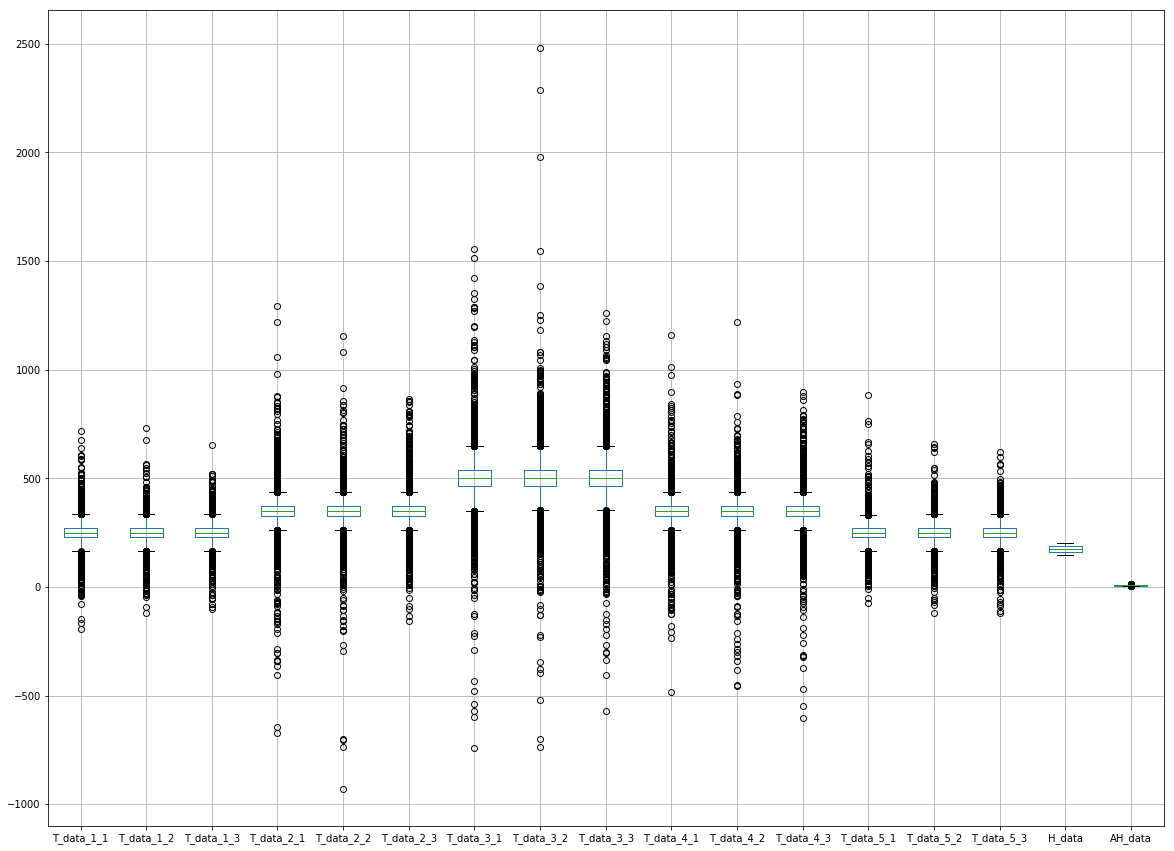

In [15]:
x_data.boxplot(figsize=(20, 15));

Пока что для нас это не особо информативно, однако уже можно заметить, что у датчиков __T_data_3_*__ самая большая диспрерсность в данных и есть много выбросов. Возможно этот признак будет значимым для нас, по отношению к остальным. Также можно заметить, что датчики в одной камере дают хоть и очень похожие, но всё равно немного различные данные. Думаю, что это тоже нужно учесть. Поэтому попробую сразу же создать по две новые колонки для каждой камеры: первая будет служит средним значениям, но т.к. среднее не может оценить разброс датчиков, второй колонкой будет стандартное отклонение.

In [16]:
for i in tqdm_notebook(range(1, 6)):
    x_data[f'T_data_std_{i}'] = np.std(x_data[[f'T_data_{i}_1', f'T_data_{i}_2', f'T_data_{i}_3']], axis=1)
    x_data[f'T_data_mean_{i}'] = np.mean(x_data[[f'T_data_{i}_1', f'T_data_{i}_2', f'T_data_{i}_3']], axis=1)

# Подготовка датасета для предсказания данных:

In [17]:
# Переиндексовываем тренировочный датасет для удобства склеивания двух таблиц:
y_df = y_train_df.reindex(x_data.index[(x_data.index < y_train_df.index[-1]) & (x_data.index > y_train_df.index[0])], method="nearest")

In [18]:
df = x_data.merge(y_df, right_index=True, left_index=True, how='inner')

# Machine Learning для решения задачи:

Небольшое лирическое отступление. Часто на работе приходится строить модели, руководствуясь одним основополагающим принципом – [быстро, качественно, недорого](http://lurkmore.to/%D0%91%D1%8B%D1%81%D1%82%D1%80%D0%BE,_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE,_%D0%BD%D0%B5%D0%B4%D0%BE%D1%80%D0%BE%D0%B3%D0%BE). Поэтому часть моделей могут банально не подойти для "продакшн-решений", так как либо требуют слишком больших затрат по подготовке данных, либо сложно настраиваются, либо требуют частого переобучения на новых данных, поэтому зачастую гораздо проще бывает выделить несколько признаков и построить по ним обычную линейную регрессию или навесить решаюший лес. Дешево и сердито.


Возможно, этот подход не является значительно подкрепленным теорией, нарушает различные предпосылки, например, условия Гаусса-Маркова, особенно пункт про некоррелированность ошибок, однако на практике нередко выручает и достаточно активно используется в соревнованиях по машинному обучению. А т.к. у меня всего 4 дня для решения данной задачи, то пока этот подход можно считать самым оптимальным.

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop([1], axis=1)
y = df[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

Лучше всего начинать с самого простого. А что может быть проще, чем линейная регрессия? Поэтому начнём с неё:

In [20]:
def plot_coefficients(coef_, X_train):
    """
    Отрисовывает отсортированные по абсолютному значению коэффициенты модели
    """
    
    coefs = pd.DataFrame(coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.title('Важность признаков для предсказания модели', fontsize=14)
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');
    
def plot_predicts(y_test, y_predict):
    """
        Отрисовывает прдсказанные значения качества в течении одного месяца.
        Промежуток времени всего месяц, т.к. так график получается наиболее читабельным.
    """
    
    xlim = y_test.loc[:'2017-06-04'].shape[0]
    tmp_df = pd.DataFrame(data=y_predict[:xlim], index=y_test.loc[:'2017-06-04'].index)

    plt.figure(figsize=(15, 8))
    plt.plot(y_test.loc[:'2017-06-04'], label='Настоящее значение')
    plt.plot(tmp_df, label='Предсказанное значение')
    plt.legend(fontsize=12)
    plt.ylabel('Качество продукции', fontsize=14)
    plt.title('Сравнение настоящего качества продукции и предсказанного в промежуток одного месяца', fontsize=14)
    plt.grid(True, axis='y')
    plt.show()    

MAE = 16.569588072235366


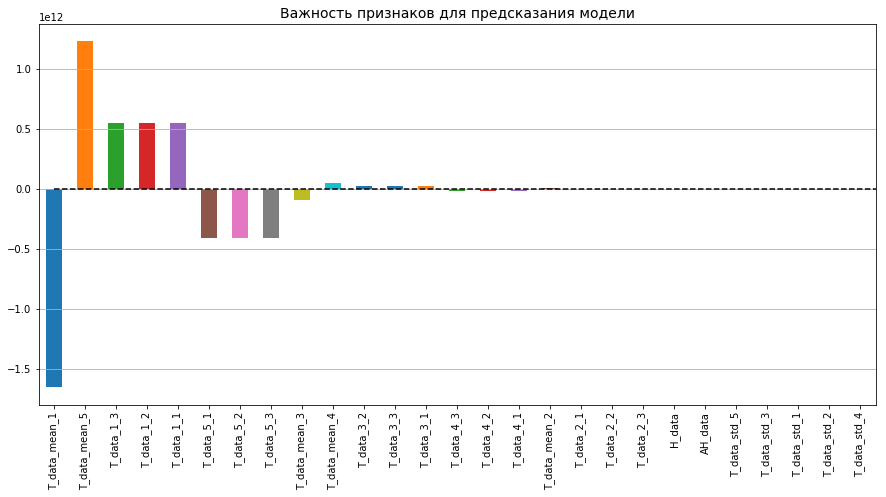

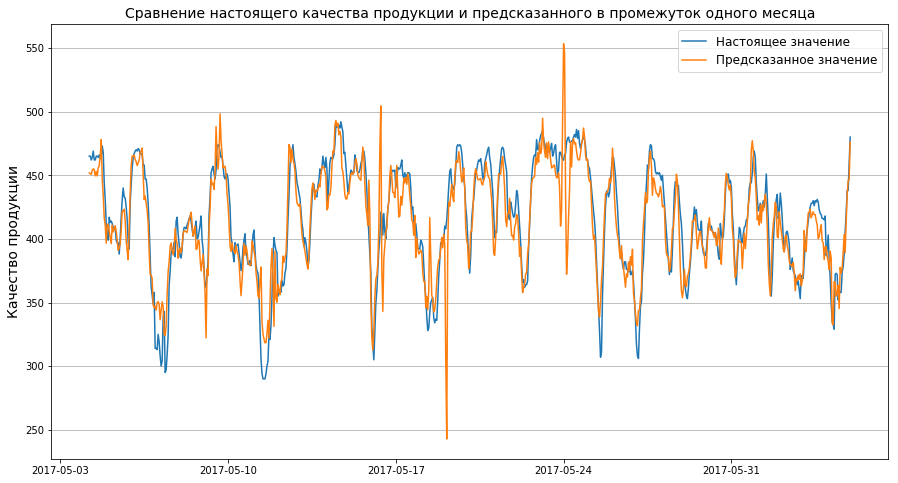

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1)
lr.fit(X_train, y_train)
print(f'MAE = {mean_absolute_error(lr.predict(X_test), y_test.values)}')
plot_coefficients(lr.coef_, X_train)
plot_predicts(y_test, lr.predict(X_test))

Как видно, линейная регрессия неплохо справляется с поставленной задачей, хотя порой заметны странные выбросы при предсказании. Значительный вклад в качество продукции вносит процессы, происходящие в камере 5 и 3. Следующим этапом попробуем модель рандомных деревьев.

Бегло взглянем на работу модели из коробки:

MAE = 13.71126213592233


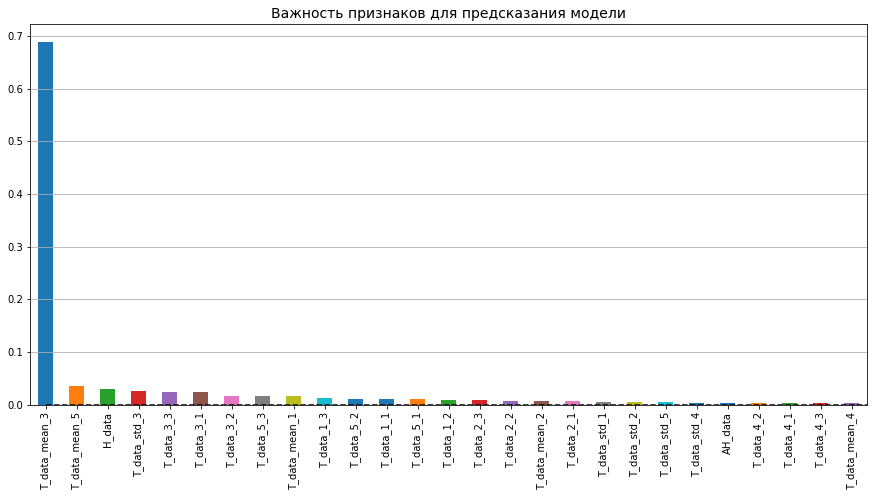

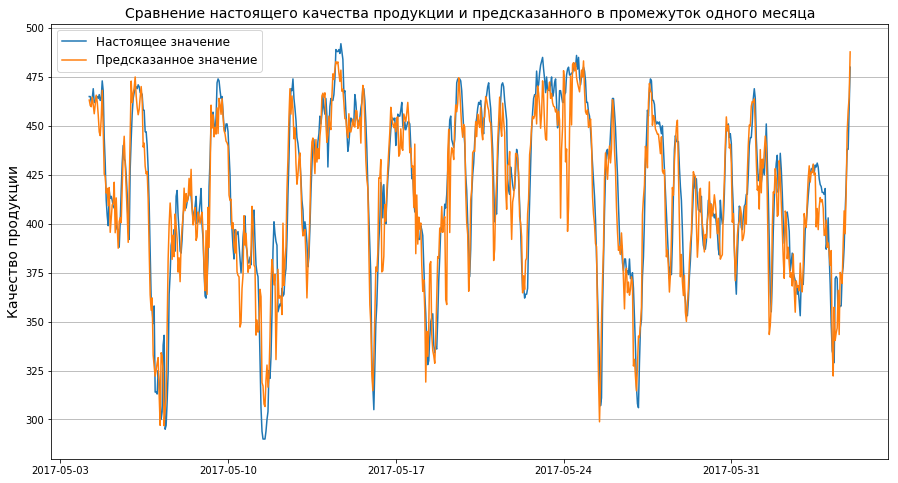

In [23]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'MAE = {mean_absolute_error(rfr.predict(X_test), y_test.values)}')
plot_coefficients(rfr.feature_importances_, X_train)
plot_predicts(y_test, rfr.predict(X_test))

Как видно, рандомный лес без каких-либо подбора гиперпараметров уже работает лучше, чем линейная модель. Теперь попробуем уменьшить ошибку:

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  5.1min finished


Best params: {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 24}
MAE = 15.405667304828231


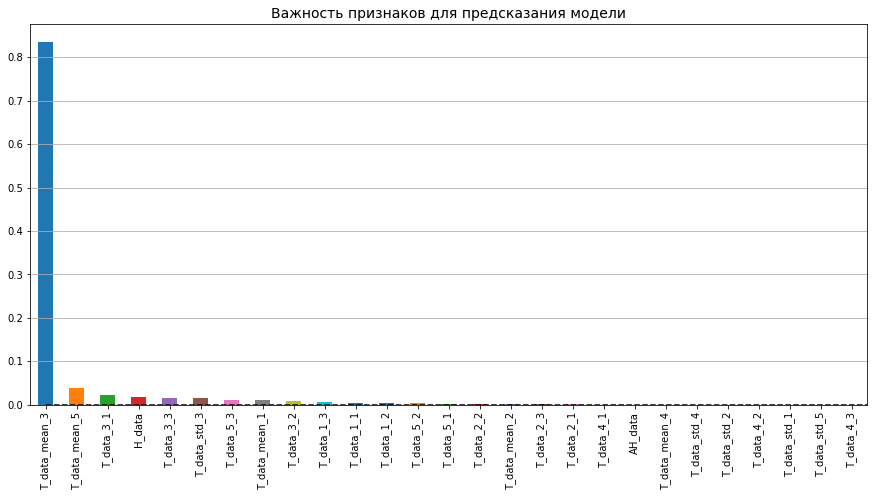

In [24]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators' : range(10, 25, 1),
    'max_depth' : range(3, 7),
    'min_samples_split' : range(4, 8)
}

clf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1), 
                   param_grid=params, cv=TimeSeriesSplit(n_splits=5), n_jobs=-1, 
                   scoring='neg_mean_absolute_error', verbose=7)

clf.fit(X_train, y_train)
print(f'Best params: {clf.best_params_}')
print(f'MAE = {mean_absolute_error(clf.predict(X_test), y_test.values)}')
plot_coefficients(clf.best_estimator_.feature_importances_, X_train)

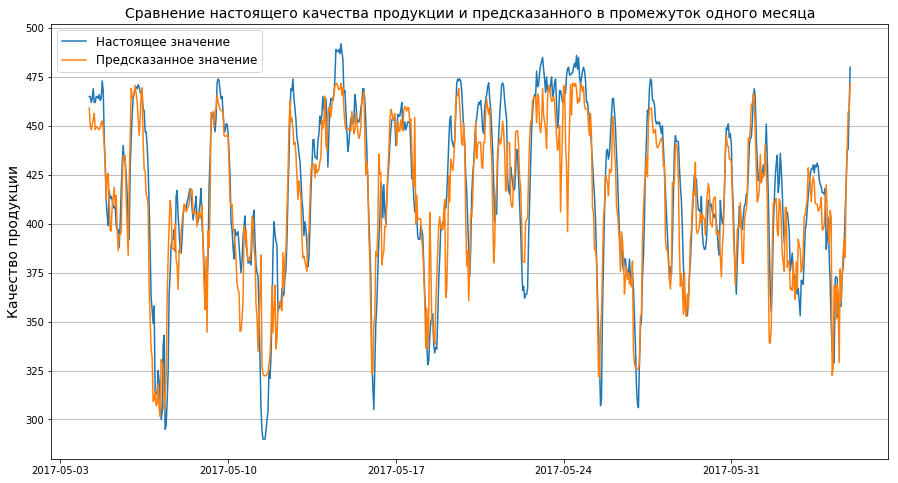

In [26]:
plot_predicts(y_test, clf.predict(X_test))

Итак, мы использовали поиск по сетке для выбора лучших параметров. Хоть ошибка МАЕ увеличилась, это не значит, что наш алгоритм стал хуже работать, наоборот, мы уменьшили вероятность его переобучения. Из графиков видно, что 3 камера сильнее всего влияет на качество продукции.

## Boosting

Почему бы теперь не попробовать XGBoost
<img src="https://habrastorage.org/files/754/a9a/26e/754a9a26e59648de9fe2487241a27c43.jpg"/>

MAE = 12.781680083479083


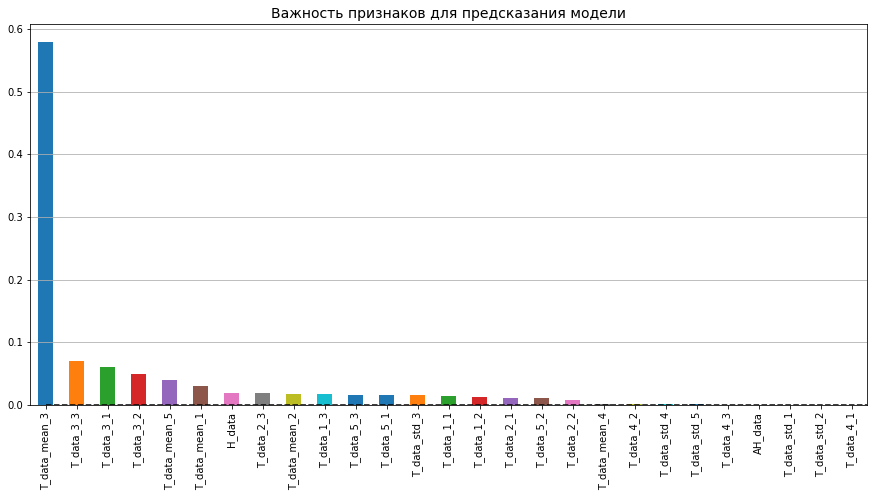

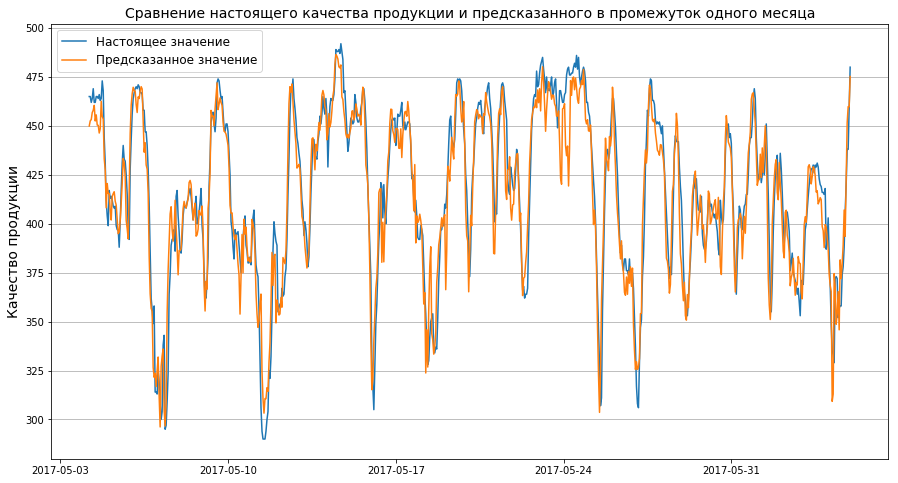

In [27]:
# !pip install xgboost

from xgboost import XGBRegressor


# Для начала посмотрим, как он отрабатывает из коробки:
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train, y_train)
print(f'MAE = {mean_absolute_error(xgb.predict(X_test), y_test.values)}')
plot_coefficients(xgb.feature_importances_, X_train)
plot_predicts(y_test, xgb.predict(X_test))

У нас получилось ещё немного уменьшить ошибку. Попробуем теперь провести поиск по параметрам:

Fitting 5 folds for each of 700 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed: 60.3min finished


Best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 220}
MAE = 12.141558576460772


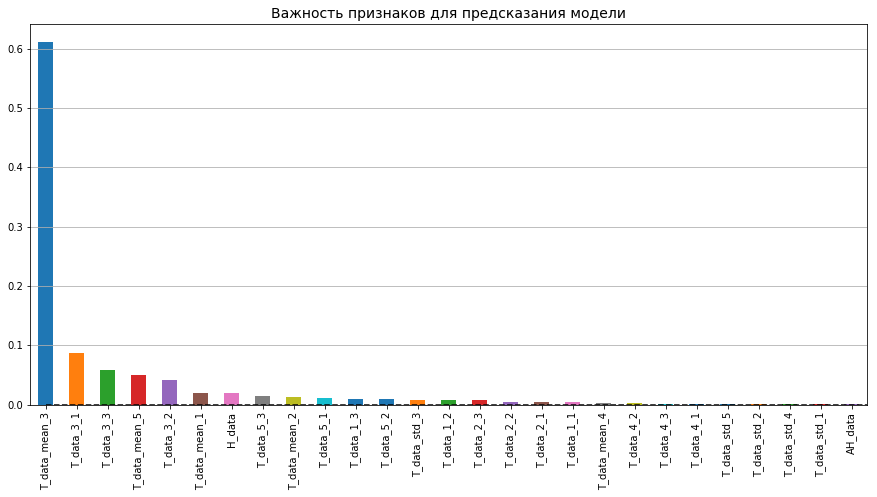

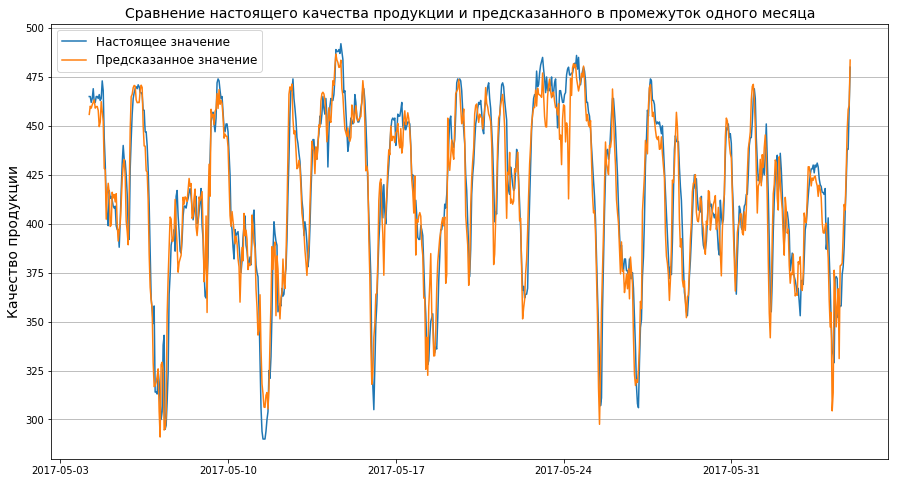

In [510]:
params = {
    'n_estimators' : range(100, 221, 20),
    'max_depth' : range(3, 8),
    'learning_rate' : [0.01, 0.5, 0.1, 0.2, 0.3],
    'min_samples_split' : range(4, 8)
}

clf_xgb = GridSearchCV(XGBRegressor(objective='reg:squarederror', n_jobs=-1), 
                   param_grid=params, cv=TimeSeriesSplit(n_splits=5), n_jobs=-1, 
                   scoring='neg_mean_absolute_error', verbose=5)

clf_xgb.fit(X_train, y_train)
print(f'Best params: {clf_xgb.best_params_}')
print(f'MAE = {mean_absolute_error(clf_xgb.predict(X_test), y_test.values)}')
plot_coefficients(clf_xgb.best_estimator_.feature_importances_, X_train)
plot_predicts(y_test, clf_xgb.predict(X_test))

А вот и самая маленькая ошибка на отложенной выборке из всех опробованных, xgboost победил!

Поиск по всем параметрам оказался слишко долгим, зря я это затеял, тут лучше использовать [RandomGridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV). Поигравшись ещё немного с параметрами и L1 регуляризацией и пришёл к тому, что лучше использовать коэф. l1 регуляризации = 0.0001, а количество деревьев = 350.

Из проделанных опытов можно увидеть, что XGBRegressor лучше всего аппроксимирует исходную функцию. Конечно, какие-то граничные случаи ему трудно обработать. Самый значительный вклад в изменение качества продукции составляли 3 и 5 камеры. Некоторые признаки никак особо не влияли на модель, и, возможно, их стоит отбросить с помощью регуляризации. Куда копать дальше - попробовать поиграться с фичами, использовать среднее, вместо медианы или суммировать, группировать по получасу, посмотреть вдруг как-то день недели или сезон влияют на качество продукции(звучит, конечно, странно, но вдруг? мы должны исследовать все теории). Также если углубиться в предметную область, то можно найти ещё несколько тонкостей, которые помогут увменьшить ошибку. На деле же, проделанная выше работа - просто черновой вариант, который показывает, что для решения данной задачи можно использовать машинное обучение. Причём для получения уже адекватных результатов достаточно простых алгоритмов и не нужно строить и обучать нейронные сети.

# Загрузка ответа:

In [28]:
# Смотрим, какие значения нам нужны:
print(y_submit.head(1).index)
print(y_submit.tail(1).index)

DatetimeIndex(['2018-05-04 00:05:00'], dtype='datetime64[ns]', name=0, freq=None)
DatetimeIndex(['2018-12-31 23:05:00'], dtype='datetime64[ns]', name=0, freq=None)


In [29]:
X_predict = x_data.loc['2018-05-04 00:00:00':'2018-12-31 23:05:00']

In [30]:
xgbr = XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    min_samples_split=4, 
    n_estimators=350,
    learning_rate=0.1,
    reg_alpha=0.0001,
    n_jobs=-1)

xgbr.fit(df.drop(1, axis=1), df[1].values)
y_submit['y_predict'] = xgbr.predict(X_predict)

In [582]:
y_submit.drop(1, axis=1).to_csv('answer.csv', header=None, sep=';')